In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


/Users/wangxiaoyang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


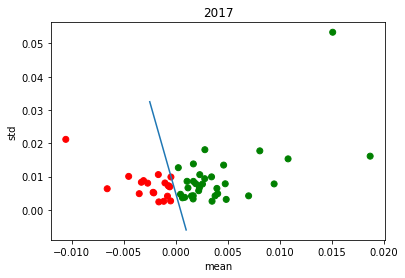

In [54]:
data = pd.read_csv('WMT1.csv')
data_17 = data[data.Year == 2017]
data_17.drop(data_17.index[-1], inplace=True)

# calculate the mean std
mean_17 = data_17.groupby('Week_Number')['Return'].mean().tolist()
std_17 = data_17.groupby('Week_Number')['Return'].std().tolist()
week_id_17 = list(data_17.groupby('Week_Number').indices.keys())
color_17 = data_17.groupby('Week_Number')['label'].agg(lambda x: x.mode()).tolist()
fig = plt.figure()
ax1 = fig.add_subplot(1,1, 1)
ax1.set_title(2017)

ax1.scatter(mean_17, std_17, c=color_17)
ax1.set_xlabel("mean")
ax1.set_ylabel("std")

X = np.linspace(-0.0025, 0.001)
Y = X*-11+0.005
ax1.plot(X, Y)
plt.show()

# for i in range(len(mean_17)):
#     plt.annotate(week_id_17[i], xy=(mean_17[i], std_17[i]), xytext=(mean_17[i], std_17[i]))


In [53]:
accuracy = 0
for i in range(len(mean_17)):
    y = mean_17[i]*-11+0.005
    if y > std_17[i]:
        if color_17[i] == 'red':
            accuracy+=1
    elif y < std_17[i]:
        if color_17[i] == 'green':
            accuracy+=1
print(accuracy)
print(accuracy/len(mean_17))

52
1.0


In [56]:
data_18 = data[data.Year == 2018]
mean_18 = data_18.groupby('Week_Number')['Return'].mean().tolist()
std_18 = data_18.groupby('Week_Number')['Return'].std().tolist()
predict_list = []
for i in range(len(mean_18)):
    if (mean_18[i]*-11+0.005) > std_18[i]:
        predict_list.append('red')
    elif (mean_18[i]*-11+0.005) < std_18[i]:
        predict_list.append('green')


print(predict_list)

['green', 'green', 'green', 'green', 'red', 'red', 'green', 'red', 'red', 'green', 'green', 'red', 'green', 'red', 'red', 'green', 'green', 'green', 'red', 'green', 'red', 'green', 'green', 'red', 'green', 'green', 'red', 'green', 'green', 'green', 'green', 'green', 'green', 'red', 'green', 'green', 'red', 'green', 'red', 'red', 'green', 'green', 'green', 'green', 'green', 'red', 'red', 'green', 'red', 'red', 'red', 'green']


In [65]:
weekly_18= data[(data.Year == 2018) & (data.Weekday == 'Friday')]['Adj Close'].tolist() # select Friday's data

previous_shares = 0
previous_balance = 100
weekly_balance = []
for i in range(len(predict_list)-1):
    if  predict_list[i+1]== 'green':
        if previous_shares == 0:
            previous_shares = previous_balance / weekly_18[i]
            previous_balance = previous_shares*weekly_18[i]
        else:
            previous_shares = previous_shares
            previous_balance = previous_shares*weekly_18[i]
    elif predict_list[i+1] == 'red':
        if previous_shares != 0:
            previous_balance = previous_shares*weekly_18[i]
            previous_shares = 0
        else:
            previous_shares = previous_shares
            previous_balance = previous_balance
    weekly_balance.append(previous_balance)

print(weekly_balance)

[100.0, 100.7396449704142, 104.4484361792054, 108.24175824175823, 108.24175824175823, 108.24175824175825, 114.13097656176873, 114.13097656176873, 114.13097656176872, 114.74312125131335, 115.32805951021159, 115.32805951021159, 117.03199538083773, 117.03199538083773, 117.03199538083773, 117.44238569112119, 117.76786766134602, 112.89978949798348, 112.89978949798348, 111.31958749551234, 111.31958749551232, 113.15622048819645, 112.27295423980638, 112.27295423980637, 113.37977325880631, 111.87173234541889, 111.8717323454189, 112.325032178543, 112.41835861477442, 114.2982196874361, 115.69811623090754, 125.53738907930692, 121.81766397808278, 121.81766397808278, 121.7780484776021, 120.2066336252019, 120.2066336252019, 117.70585633014949, 117.70585633014949, 117.70585633014947, 120.60851061273208, 122.82742855319522, 125.80748694998002, 131.04516534432906, 121.27934626915118, 121.27934626915118, 121.27934626915118, 116.37499896870663, 116.37499896870663, 116.37499896870663, 116.37499896870665]


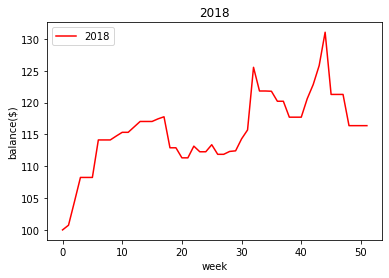

In [71]:
data_18 = data[(data.Year == 2018) & (data.Weekday == 'Friday')]  # select Friday's data
plt.plot(data_18['Week_Number'], weekly_balance, label=2018,color = 'red')
plt.xlabel('week')
plt.ylabel('balance($)')
plt.title(2018)
plt.legend()

plt.show()